In [1]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt

In [2]:
# to open file
with open(f'saves/lake_data_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# all lake id's 
len(data.keys())

5140

## Inside look at a lake dictionary

In [4]:
# "inside" look of a lake dictionary
ex_lake = list(data.keys())[0]
data[ex_lake].keys()

dict_keys(['name', 'sats', 'tracks', 'wlts', 'extr', 'conv'])

In [5]:
data[ex_lake]['name']

'LAKE INGIA'

In [6]:
data[ex_lake]['sats']

['S3A']

In [7]:
data[ex_lake]['tracks']

['141']

In [8]:
data[ex_lake]['wlts']

[        time           wl      wlsd
 0   2016.297  2319.433730  0.138759
 1   2016.371  2319.898838  0.137995
 2   2016.445  2319.656873  0.084807
 3   2016.519  2320.456965  0.073194
 4   2016.592  2322.659886  0.073185
 ..       ...          ...       ...
 72  2022.654  2322.722921  0.206910
 73  2022.728  2325.920330  0.138795
 74  2022.802  2327.244563  0.084403
 75  2022.876  2327.232983  0.105314
 76  2022.950  2326.720682  0.104958
 
 [77 rows x 3 columns]]

In [9]:
data[ex_lake]['extr']

[       timeu  cycle       lat       long
 0   2016.297      3  7.102183  39.252601
 1   2016.371      4  7.100635  39.250301
 2   2016.445      5  7.084376  39.260724
 3   2016.519      6  7.083862  39.261744
 4   2016.592      7  7.085631  39.263085
 ..       ...    ...       ...        ...
 72  2022.654     89  7.084598  39.255327
 73  2022.728     90  7.068453  39.258645
 74  2022.802     91  7.080166  39.259940
 75  2022.876     92  7.083377  39.260097
 76  2022.950     93  7.085680  39.256854
 
 [77 rows x 4 columns]]

In [10]:
data[ex_lake]['conv']

[   SigmaObs  SigmaRW  conv                message
 0  0.145119  4.59913     1  false convergence (8)]

## Data summary

### Model convergence

In [11]:
# model convergence
conv = []
non_conv = []
for lake in data.keys():
    count = 0
    count_n = 0
    for conv_tab in data[lake]['conv']:
        if conv_tab.conv[0]==0:
            count +=1
        if conv_tab.conv[0]==1:
            count_n +=1
    conv.append(count)
    non_conv.append(count_n)

In [12]:
# total number of converged models
sum(conv)

9098

In [13]:
# lakes with one or more converged models
np.count_nonzero(conv)

4880

In [14]:
# number of converged models
conv_count_u = np.unique(conv, return_counts=True)
conv_count_u

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 20, 21, 23, 25, 27, 32, 34, 36, 37]),
 array([ 260, 2615, 1630,  250,  163,   68,   48,   27,   23,   11,   11,
           4,    6,    3,    2,    3,    3,    2,    1,    2,    1,    2,
           1,    1,    1,    1,    1], dtype=int64))

In [15]:
# number of not converged models
np.unique(non_conv, return_counts=True)

(array([0, 1, 2]), array([4693,  434,   13], dtype=int64))

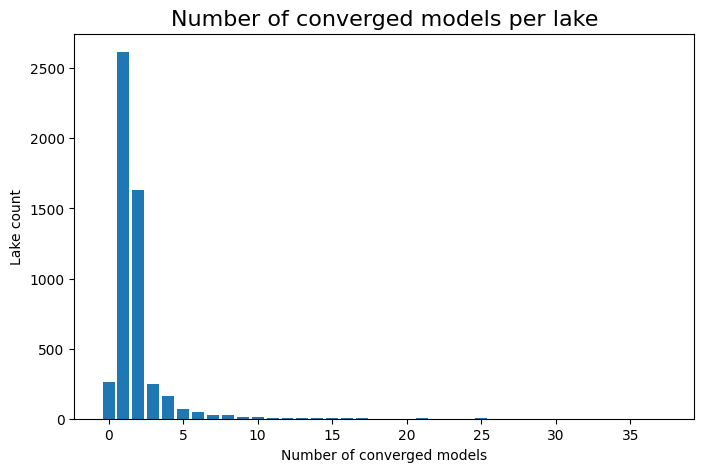

In [16]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(lake_id_df.wlts_count, bins=np.arange(0,38,1))
ax.bar(conv_count_u[0],conv_count_u[1])
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Number of converged models per lake", fontsize=16)
ax.set_xlabel("Number of converged models")
ax.set_ylabel("Lake count")
#ax.set_yscale('log')
plt.savefig(f"plots/hist_conv.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

### time series per lake

In [17]:
# count time series per lake
wlts_count = [len(data[lake]['wlts']) for lake in data.keys()]

In [18]:
# lakes with one or more time series
np.count_nonzero(wlts_count)

5032

In [19]:
# total number of time series
sum(wlts_count)

9558

In [20]:
wlts_count_u = np.unique(wlts_count, return_counts=True)
wlts_count_u

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 20, 21, 22, 24, 25, 26, 27, 33, 34, 36, 37]),
 array([ 108, 2585, 1763,  267,  185,   69,   52,   30,   19,   15,   12,
           4,    6,    3,    3,    2,    3,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1], dtype=int64))

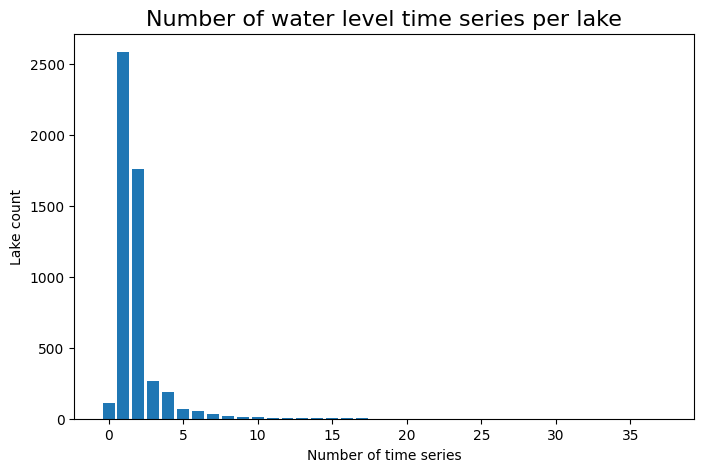

In [21]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(lake_id_df.wlts_count, bins=np.arange(0,38,1))
ax.bar(wlts_count_u[0],wlts_count_u[1])
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Number of water level time series per lake", fontsize=16)
ax.set_xlabel("Number of time series")
ax.set_ylabel("Lake count")
#ax.set_yscale('log')
plt.savefig(f"plots/hist_wlts.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

### time series lengths and startyears

In [22]:
# length of time series
wlts_len = []
for lake in data.keys():
    for wlts in data[lake]['wlts']:
        wlts_len.append(len(wlts))

In [23]:
wlts_len_u = np.unique(wlts_len, return_counts=True)
wlts_len_u

(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
        81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]),
 array([  20,   31,   26,   28,   25,   27,   20,   20,   21,   26,   33,
          22,   22,   23,   24,   15,   37,   33,   25,   32,   31,   30,
          23,   31,   37,   31,   42,   30,   38,   39,   43,   35,   44,
          48,   49,   60,   67,   66,   64,   99,  174,  781, 1326,  580,
          50,   68,  200,  321,  202,  104,   12,   12,   14,   21,   22,
          23,   19,   16,   24,   27,   24,   31,   32,   32,   31,   35,
          31,   50,   22,   34,   47,   54,   66,  100,  105,  218,  624,
         870, 1126,  535,   78], dtype=int64))

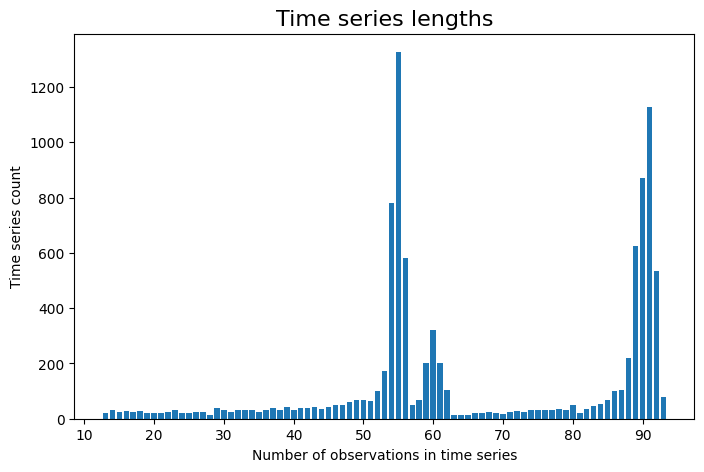

In [24]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(wlts_len,bins=np.arange(0,101,1))
ax.bar(wlts_len_u[0],wlts_len_u[1])
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Time series lengths", fontsize=16)
ax.set_xlabel("Number of observations in time series")
ax.set_ylabel("Time series count")
plt.savefig(f"plots/hist_wlts_length.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

In [25]:
# accumulated time series 
# aka how many series has 1 or more, 2 or more, 3 or more etc observations
wlts_len_u_cum = np.flip(np.cumsum(np.flip(wlts_len_u[1])))
wlts_len_u_cum

array([9558, 9538, 9507, 9481, 9453, 9428, 9401, 9381, 9361, 9340, 9314,
       9281, 9259, 9237, 9214, 9190, 9175, 9138, 9105, 9080, 9048, 9017,
       8987, 8964, 8933, 8896, 8865, 8823, 8793, 8755, 8716, 8673, 8638,
       8594, 8546, 8497, 8437, 8370, 8304, 8240, 8141, 7967, 7186, 5860,
       5280, 5230, 5162, 4962, 4641, 4439, 4335, 4323, 4311, 4297, 4276,
       4254, 4231, 4212, 4196, 4172, 4145, 4121, 4090, 4058, 4026, 3995,
       3960, 3929, 3879, 3857, 3823, 3776, 3722, 3656, 3556, 3451, 3233,
       2609, 1739,  613,   78], dtype=int64)

In [26]:
idx = 76
wlts_len_u[0][idx]

89

In [27]:
wlts_len_u_cum[idx]

3233

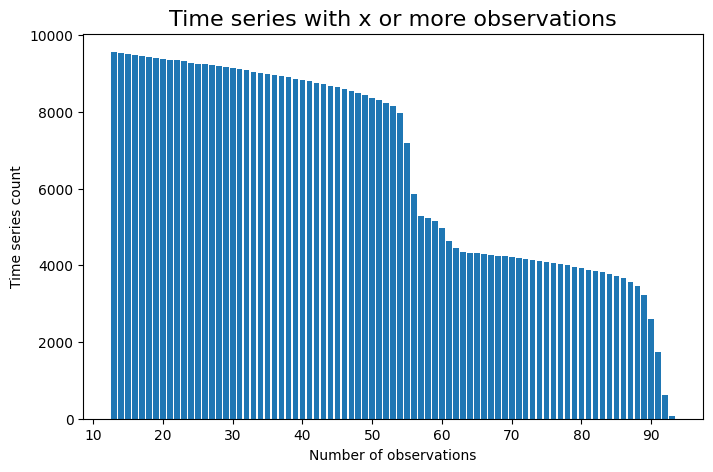

In [28]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(wlts_len,bins=np.arange(0,101,1))
ax.bar(wlts_len_u[0],wlts_len_u_cum)
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Time series with x or more observations", fontsize=16)
ax.set_xlabel("Number of observations")
ax.set_ylabel("Time series count")
plt.savefig(f"plots/hist_wlts_length_cum.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

In [29]:
# first year of time series
wlts_year1 = []
for lake in data.keys():
    for wlts in data[lake]['wlts']:
        wlts_year1.append(int(wlts.time[0]))

In [30]:
wlts_year1_u = np.unique(wlts_year1, return_counts=True)
wlts_year1_u

(array([2016, 2017, 2018, 2019, 2020]),
 array([4846,    6, 4489,  207,   10], dtype=int64))

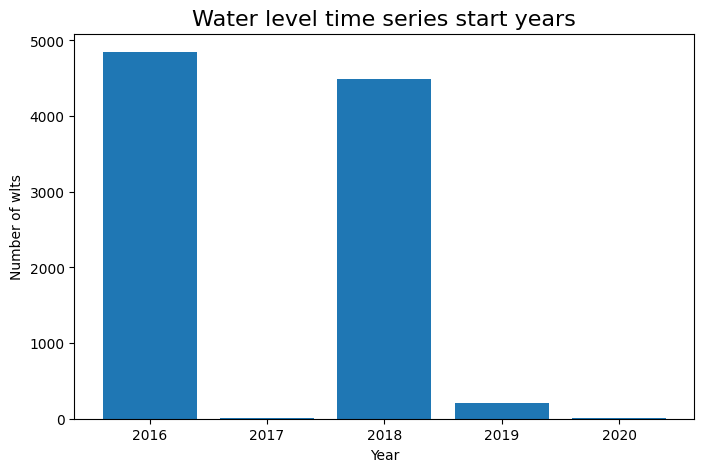

In [31]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(years, bins=np.arange(2016,2024,1), rwidth=0.9)
ax.bar(wlts_year1_u[0], wlts_year1_u[1])
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Water level time series start years", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Number of wlts")
plt.savefig(f"plots/hist_year_rep.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

### cycles

In [32]:
all_cycles = []
for lake in data.keys():
    for extr in data[lake]['extr']:
        all_cycles.extend(list(extr.cycle))

In [33]:
all_cycles_u = np.unique(all_cycles, return_counts=True)
all_cycles_u

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93]),
 array([1737, 4072, 4325, 4425, 4475, 4543, 4432, 4586, 5198, 5426, 5423,
        5331, 5392, 4499, 4573, 4473, 4414, 4738, 8250, 8821, 8696, 8769,
        8818, 8822, 8600, 8740, 8801, 8815, 8764, 8736, 8735, 8835, 8858,
        8819, 8771, 8810, 8725, 8759, 8758, 8781, 8780, 8741, 8793, 7975,
        8774, 8789, 8822, 8784, 8810, 8806, 8799, 8795, 8469, 7639, 8752,
        8805, 8773, 8780, 8825, 8861, 8847, 8780, 8050, 8848, 8774, 8795,
        8821, 8835, 8832, 8847, 8796, 8798, 7081, 7260, 4433, 4462, 4472,
        4486, 4423, 4427, 4090, 3637, 4235, 4456, 4457, 4425

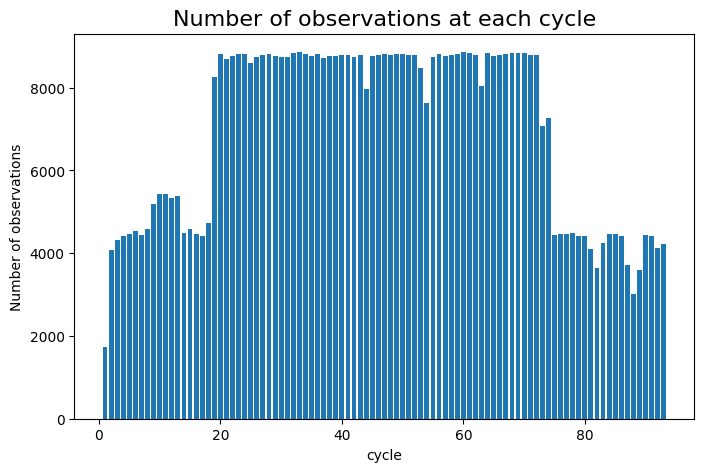

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
#ax.hist(years, bins=np.arange(2016,2024,1), rwidth=0.9)
ax.bar(all_cycles_u[0], all_cycles_u[1])
#fig.suptitle(f'Number of converged models per lake', fontsize=16)
ax.set_title("Number of observations at each cycle", fontsize=16)
ax.set_xlabel("cycle")
ax.set_ylabel("Number of observations")
plt.savefig(f"plots/hist_cycles.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

### satellites

In [35]:
# count time series per satelite
wlts_count_A = 0
wlts_count_B = 0
for lake in data.keys():
    for sat in data[lake]['sats']:
        if sat == "S3A":
            wlts_count_A+=1
        elif sat == "S3B":
            wlts_count_B+=1


In [36]:
wlts_count_A

4854

In [37]:
wlts_count_B

4704

# standard deviation

In [130]:
all_sigmaObs = []
all_std = []
for lake in data.keys():
    for i, conv in enumerate(data[lake]['conv']):
        all_sigmaObs.append(conv.SigmaObs[0])
        std = np.std(data[lake]['wlts'][i].wl)
        all_std.append(std)


In [141]:
np.mean(all_std)

6.540306798399664

In [143]:
np.median(all_std)

0.5167371545617505

In [155]:
sig_v = 1
std_v = 7
count_sig = [1 for sig in all_sigmaObs if sig>sig_v]
count_std = [1 for std in all_std if std>std_v]
print(np.sum(count_sig))
print(np.sum(count_std))

1023
1052


In [151]:
z = np.ones(len(all_sigmaObs))

In [152]:
z[np.asarray(all_sigmaObs) <=sig_v] = 0

In [153]:
z[np.asarray(all_std) <=std_v] = 0

In [154]:
np.sum(z)

562.0